In [37]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

from utils.gmm_posterior import gmm_posterior

## Binary (Banknote autentification)
### Noisy Natarajan matrix

In [38]:
df_list = []
folder_path = 'Results/banknote-authentication_Noisy_Natarajan'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,0.632243,0.692799,0.789091,0.018372,0.018488,Adam,Backward,0,0.001,0.001,0.2
1,2,0.545533,0.754786,0.854545,0.016192,0.016154,Adam,Backward,0,0.001,0.001,0.2
2,3,0.488354,0.818596,0.880000,0.014552,0.014465,Adam,Backward,0,0.001,0.001,0.2
3,4,0.444350,0.855971,0.905455,0.013240,0.013136,Adam,Backward,0,0.001,0.001,0.2
4,5,0.409042,0.882407,0.920000,0.012167,0.012055,Adam,Backward,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,46,0.678663,0.978122,0.967273,0.006919,0.007398,Adam,Forward,9,0.001,0.001,0.4
2996,47,0.678596,0.978122,0.967273,0.006851,0.007326,Adam,Forward,9,0.001,0.001,0.4
2997,48,0.678532,0.979034,0.967273,0.006786,0.007257,Adam,Forward,9,0.001,0.001,0.4
2998,49,0.678469,0.979034,0.967273,0.006722,0.007189,Adam,Forward,9,0.001,0.001,0.4


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\3370646565.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\3370646565.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])


['Backward', 'Forward']


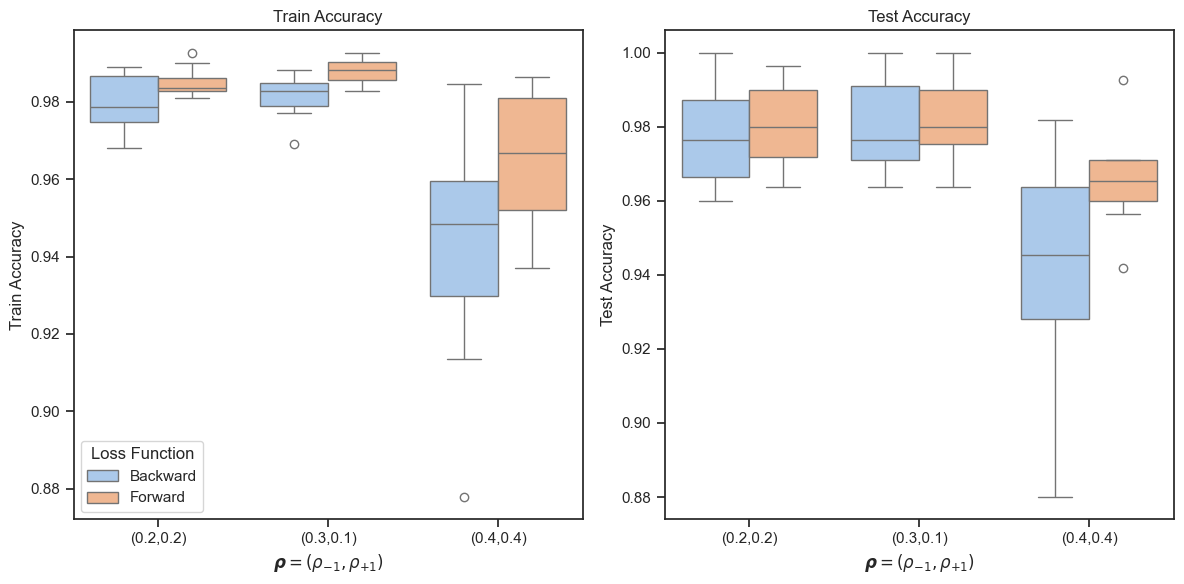

In [41]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 5]


selected_loss_fns = ['Backward', 'Forward']
epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\boldsymbol{\rho}=(\rho_{-1},\rho_{+1})$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\boldsymbol{\rho}=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

## GMM 
### Complementary

In [4]:
df_list = []
folder_path = 'Results/gmm_Complementary'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.149725,0.783750,0.79625,0.029851,0.030161,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.840278,0.798125,0.79625,0.023433,0.023843,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.692063,0.798438,0.79625,0.020259,0.020688,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.614576,0.799063,0.79625,0.018502,0.018923,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.568918,0.798750,0.79875,0.017415,0.017819,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,46,1.194932,0.864375,0.87875,0.012157,0.011918,Adam,Forward,9,0.001,0.001,0.2
1996,47,1.194858,0.864375,0.87875,0.012143,0.011904,Adam,Forward,9,0.001,0.001,0.2
1997,48,1.194787,0.865000,0.87875,0.012129,0.011890,Adam,Forward,9,0.001,0.001,0.2
1998,49,1.194721,0.864688,0.87875,0.012116,0.011876,Adam,Forward,9,0.001,0.001,0.2


['Backward', 'Forward']


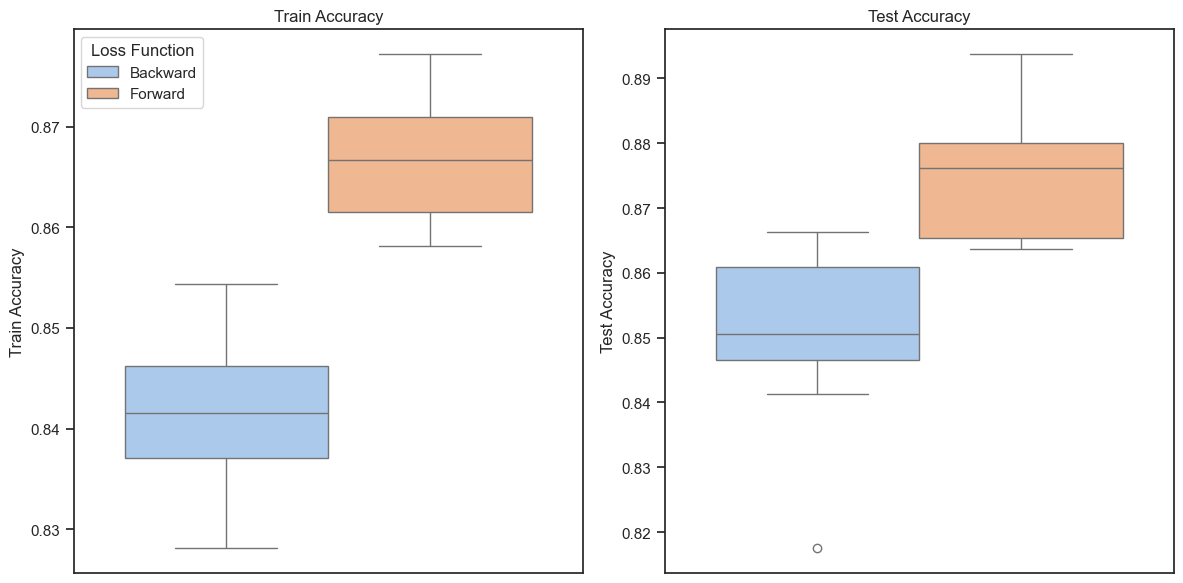

In [17]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 30]


selected_loss_fns = ['Backward','Forward']
epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel('')
axes[0].set_ylabel('Train Accuracy')
#axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = [r'Backward',r'Forward']  
axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel('')
axes[1].set_ylabel('Test Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

In [7]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_Complementary"
corr = 0.2 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward','Forward','Backward_conv','Forward_opt']
results = []
for los in losses:
    for rep in range(10):
        model_file = folder + f"/{los}_p_+{corr}p_-None_{rep}.pkl"
        with open(model_file, "rb") as f:
            model = pickle.load(f)
            f.close()
        model = model['overall_models']

        data_folder = f"Datasets/weak_datasets/gmm_Complementary_p{corr}"
        data_file = data_folder +  f"/Dataset_{rep}.pkl"
        f = open(data_file,"rb")
        Data,Weak = pickle.load(f)
        data = Data.test_dataset.data.to(device)

        
        yhat = soft(model(data)).cpu().detach().numpy()
        POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
        AB = POS-yhat
        norms = np.diag(AB@AB.T)

        mean_norm = np.mean(norms)
        std_norm = np.std(norms)
        
        # Store values in the results list
        results.append({
            'Corruption':corr,
            "Loss Function": los,
            "Repetition": rep,
            "Mean norm": mean_norm,
            "Std norm": std_norm
        })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.042689,0.104623
1,0.2,Backward,1,0.038606,0.083026
2,0.2,Backward,2,0.072547,0.167305
3,0.2,Backward,3,0.060612,0.153832
4,0.2,Backward,4,0.037947,0.093236
5,0.2,Backward,5,0.037906,0.105829
6,0.2,Backward,6,0.036232,0.094753
7,0.2,Backward,7,0.061577,0.154611
8,0.2,Backward,8,0.048743,0.096322
9,0.2,Backward,9,0.032720,0.106432


['Backward', 'Forward']


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\1472496977.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([' '])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\1472496977.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([' '])


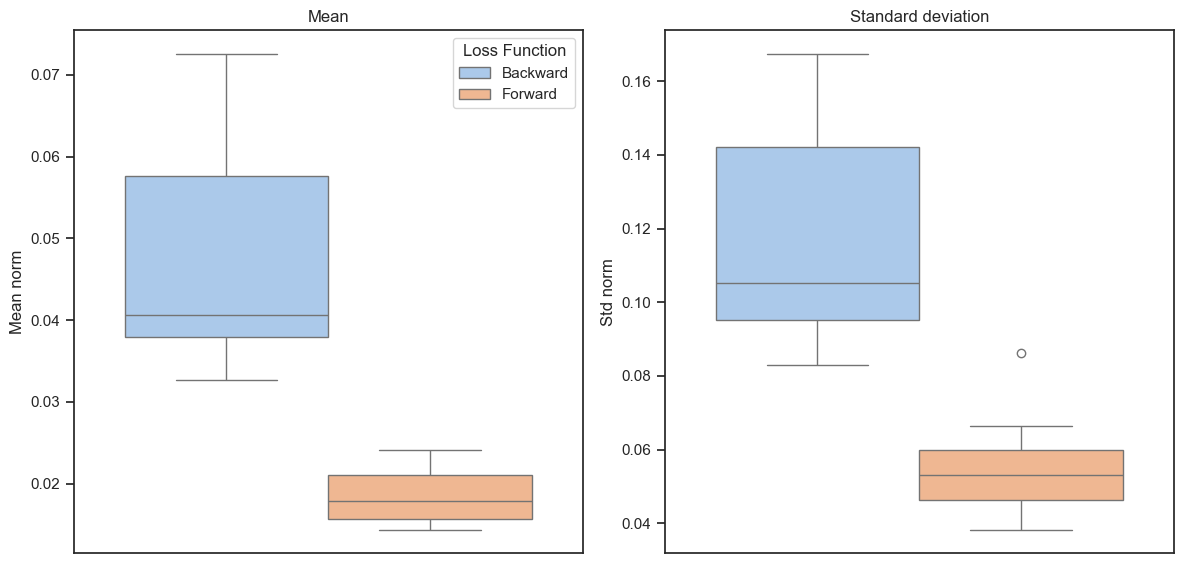

In [19]:
selected_loss_fns = ['Backward', 'Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0])
axes[0].set_title('Mean')
axes[0].set_xlabel(' ')
#axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels([' '])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1])
axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
#axes[1].set_ylabel('Test Accuracy')
axes[1].set_xlabel(' ')
#axes[0].set_ylabel('Train Accuracy')
axes[1].set_xticklabels([' '])
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

## GMM 
### Partial

In [42]:
df_list = []
folder_path = 'Results/gmm_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.117067,0.789687,0.79875,0.028266,0.028594,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.789817,0.799375,0.79875,0.021820,0.022241,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.648355,0.799687,0.80000,0.018844,0.019260,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.578232,0.800625,0.79875,0.017202,0.017586,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.537087,0.800625,0.80125,0.016153,0.016502,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,46,1.573098,0.869687,0.87625,0.011620,0.011363,Adam,Forward,9,0.001,0.001,0.8
8996,47,1.573013,0.870000,0.87625,0.011598,0.011337,Adam,Forward,9,0.001,0.001,0.8
8997,48,1.572931,0.870938,0.87875,0.011576,0.011312,Adam,Forward,9,0.001,0.001,0.8
8998,49,1.572852,0.871563,0.87875,0.011556,0.011289,Adam,Forward,9,0.001,0.001,0.8


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\4157731131.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\4157731131.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']


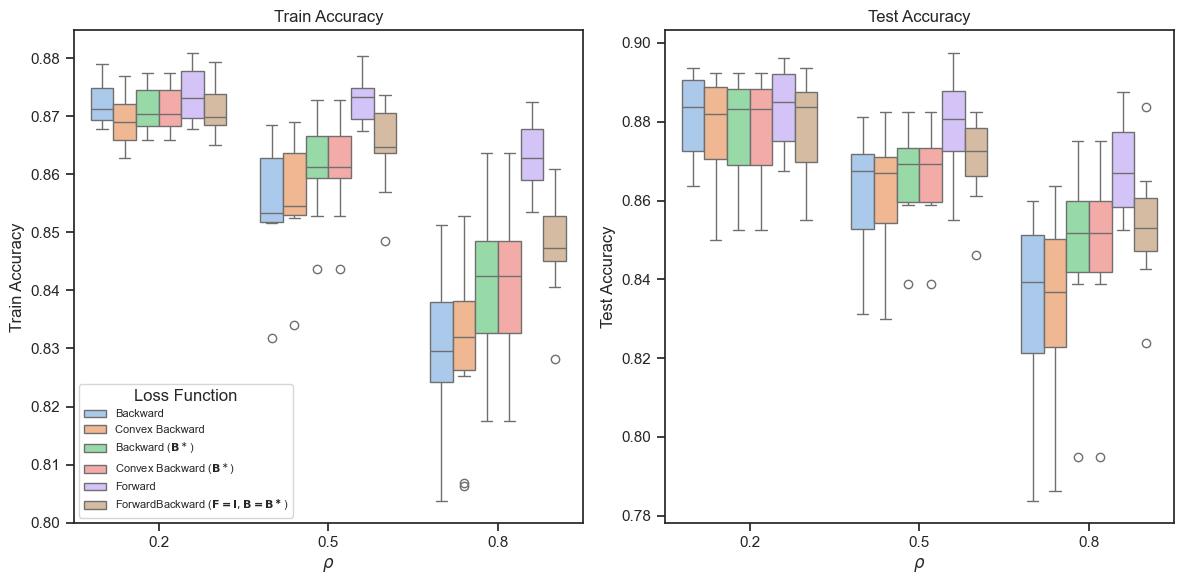

In [47]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 5]

epoch_50_df = last_epoch_df
#selected_loss_fns = ['Backward', 'Forward']
#epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})
#axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_pll"
corr = [0.2,0.5,0.8] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            model_file = folder + f"/{los}_p_+{cor}p_-None_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            data_folder = f"Datasets/weak_datasets/gmm_pll_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.014501,0.065421
1,0.2,Backward,1,0.010545,0.033848
2,0.2,Backward,2,0.010841,0.042047
3,0.2,Backward,3,0.015757,0.062976
4,0.2,Backward,4,0.011283,0.033255
...,...,...,...,...,...
175,0.8,Forward_opt,5,0.038886,0.094664
176,0.8,Forward_opt,6,0.028904,0.072707
177,0.8,Forward_opt,7,0.056879,0.142925
178,0.8,Forward_opt,8,0.045080,0.106923


In [ ]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 5]

epoch_50_df = last_epoch_df
#selected_loss_fns = ['Backward', 'Forward']
#epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})
#axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\1168719172.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_4292\1168719172.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']


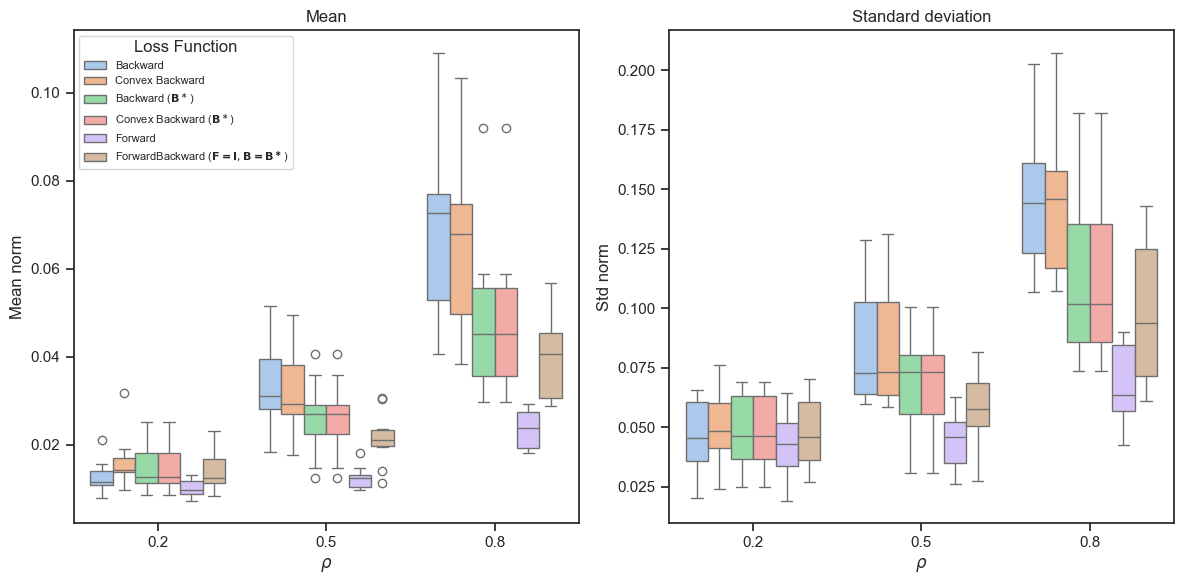

In [53]:
selected_loss_fns = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0])
axes[0].set_title('Mean')
#axes[0].set_ylabel('Train Accuracy')

axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1])
axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
#axes[1].set_ylabel('Test Accuracy')
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()